### Health Care Data Analysis Project

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load Data
data = pd.read_csv("./Health_dataset.csv")

# Checking Imported Data
data.head()

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28


1. Count the total number of patients.

In [41]:
tot_patients = data.shape[0]
print(f"Total Patients => {tot_patients}.")

Total Patients => 8000.


2. How is the patient population distributed by gender.

In [42]:
gender_distribution = data["Gender"].value_counts()

print(f"Gender Distribution\n{gender_distribution}.")

Gender Distribution
Gender
Male      5206
Female    2794
Name: count, dtype: int64.


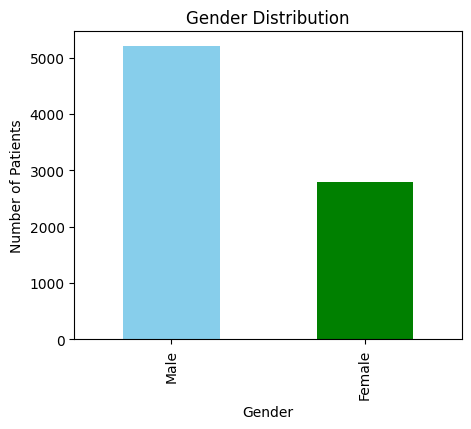

In [76]:
plt.figure(figsize= (5,4))

gender_distribution.plot(kind="bar", color=['skyblue', 'green'])

# Adding Title
plt.title("Gender Distribution")

# Adding Label on Y-axis
plt.ylabel("Number of Patients")

# For Visualization of graph
plt.show()


3. Patient's Age group by visit.

Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64


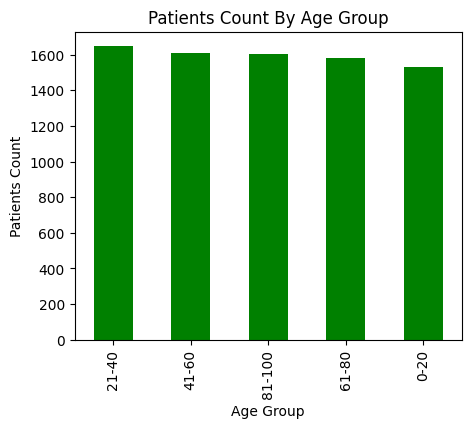

In [75]:
# 1. Convert Admission Date and DOB to proper format.
data['Admission Date'] = pd.to_datetime(data['Admission Date'])
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])

# 2. Calculate patient's age by Admission Age
data['Age'] = (data['Admission Date'] - data['Date of Birth']).dt.days / 365.25
data['Age'] = data['Age'].astype(int)

# 3. Define Age Bins
age_bins = [0,20,40,60,80,100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# 4. Creating new col "Age Group", to put individual age value into respective group.
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# 5. Count Number of Patients in each Age Group
patients_count = data['Age Group'].value_counts()

# 6. Result
print(patients_count)

# 7. Visualize the Result.
plt.figure(figsize= (5,4))

patients_count.plot(kind='bar', color=['green'])

plt.ylabel('Patients Count')
plt.title('Patients Count By Age Group')
plt.show()



4. Which diseases are most commonly diagnosed among the patients ?

Text(0.5, 1.0, 'Disease Counts')

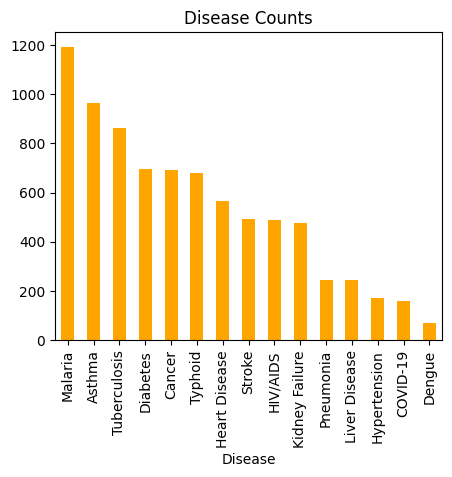

In [74]:
disease_counts = data['Disease'].value_counts()

# Visualize Disease Count
plt.figure(figsize= (5,4))

disease_counts.plot(kind='bar', color=['orange'])

# Chart Title
plt.title('Disease Counts')


4.1 If we want to see top 3 or 5 diseases.

In [ ]:
# Below line will work as a parameter for nlargest() function.
dynamic_disease_count = 5

top_disease_count = data['Disease'].value_counts().nlargest(dynamic_disease_count)
top_disease_count

# Visualize Top 3 Diseases
# top_disease_count.plot(kind='bar', color=['blue'])

# plt.title('Disease Counts')
# plt.show()

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Diabetes         694
Cancer           691
Name: count, dtype: int64

4.2 Calculate Percentage of top 3 diseases out of Total diseases.

In [47]:
# 1. Calculating Sum of Total Diseases.
total_disease_count = data['Disease'].value_counts().sum()
# print(total_disease_count)

# 2. Calculating Percentage
   # "top_disease_count" is from above cells. 
percentages_of_Top_Diseases = ((top_disease_count/total_disease_count) * 100).round(2)

# print(f"Percentages of Top Diseases\n {percentages_of_Top_Diseases}%")

# 3. Alloting "%" sign to all values. 
for disease, i in percentages_of_Top_Diseases.items():
    print(f"{disease}: {i} %")


Malaria: 14.91 %
Asthma: 12.08 %
Tuberculosis: 10.8 %
Diabetes: 8.67 %
Cancer: 8.64 %


5. Are certain diseases more prevalent in one gender compared to the other ?

In [48]:
gender_disease = pd.crosstab(data['Disease'], data['Gender'])
print('Disease with Gender Distribution')
print(gender_disease)

Disease with Gender Distribution
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


6. Calculate the duration of each patient stay and create a group to show numbers of patients in each group.

In [49]:
# 1. Convert "Admission Date" and "Discharge Date" to a proper date time format other than strings.
data['Admission Date'] = pd.to_datetime(data['Admission Date'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# 2. Creating new column "Duration of Stay" and calculate difference b/w Discharge and Admission date to find duration.
data['Duration_of_Stay'] = (data['Discharge Date'] - data['Admission Date']).dt.days

data[['Admission Date', 'Discharge Date', 'Duration_of_Stay']].head()

,Admission Date,Discharge Date,Duration_of_Stay
0,2022-12-19,2023-01-16,28
1,2023-03-29,2023-04-21,23
2,2022-09-16,2022-10-15,29
3,2022-02-07,2022-02-11,4
4,2022-10-25,2022-10-30,5


In [50]:
# 3. Creating bins and labels.
bins = [-1, 0, 3,7,14, float('inf')]
duration_label = ["Same Day", "1-3 Days", "4-7 Days", "8-14 Days", "Above 21 Days"]
data['Duration Groups'] = pd.cut(data['Duration_of_Stay'], bins = bins, labels = duration_label, right= False)

data[['Admission Date', 'Discharge Date', 'Duration_of_Stay', 'Duration Groups']].head()


,Admission Date,Discharge Date,Duration_of_Stay,Duration Groups
0,2022-12-19,2023-01-16,28,Above 21 Days
1,2023-03-29,2023-04-21,23,Above 21 Days
2,2022-09-16,2022-10-15,29,Above 21 Days
3,2022-02-07,2022-02-11,4,4-7 Days
4,2022-10-25,2022-10-30,5,4-7 Days


6.1 Number of Patients in each group.

Patients in Each Group
 Duration Groups
Above 21 Days    4530
8-14 Days        1860
4-7 Days         1054
1-3 Days          556
Same Day            0
Name: count, dtype: int64


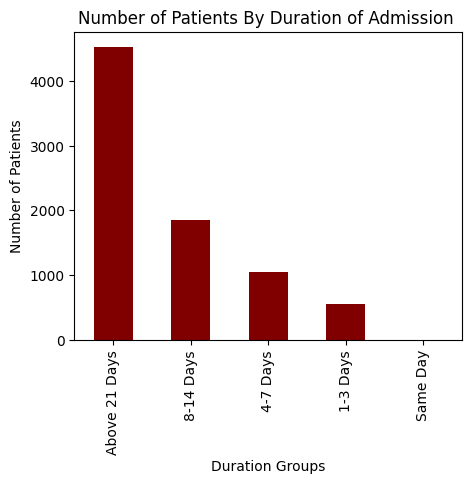

In [ ]:
total_patient_in_group = data['Duration Groups'].value_counts()

print(f'Patients in Each Group\n {total_patient_in_group}')

# Chart Visualization
plt.figure(figsize= (5,4))

total_patient_in_group.plot(kind='bar', color=['maroon'])
plt.title('Number of Patients By Duration of Admission ')
plt.ylabel('Number of Patients')
plt.show()






7. For any records with a recorded course of death, analyze pattern to identify risk factor.

Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


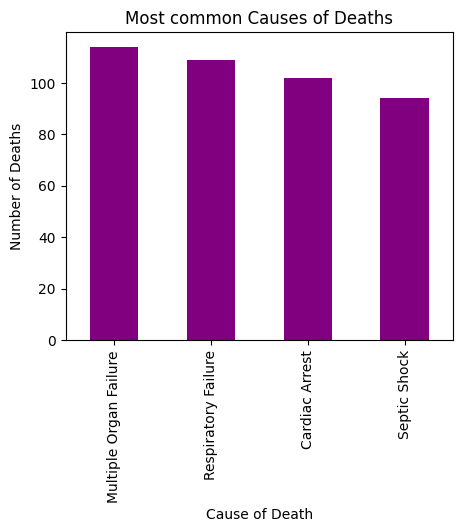

In [79]:
# 1. Filter "Cause of Death" column by dropping N/A values.
    # subset='Cause of Death', only considers "Cause of Death" Column
death_cause = data.dropna(subset='Cause of Death')

count_cause = death_cause['Cause of Death'].value_counts()

print(count_cause)

# 2. Visualize The Data

plt.figure(figsize= (5,4)) # Adjust figure size
count_cause.plot(kind='bar', color=['purple'])
plt.title('Most common Causes of Deaths')
plt.ylabel('Number of Deaths')
plt.show()



8. What are the percentage of the following patients: Deceased, under-treatment, and recovered patients.

In [90]:
# 1. Checking number of patients against treatment statuses.
treatment_status = data['Treatment Status'].value_counts()
print(treatment_status)

# 2. Total Number of Patients
total_patients = data.shape[0]
print(f'Total Patients => {total_patients}') 

Treatment Status
Recovered          6819
Under Treatment     762
Deceased            419
Name: count, dtype: int64
Total Patients => 8000


Recovered = 85.24 %
Under Treatment = 9.52 %
Deceased = 5.24 %


<Axes: title={'center': 'Treatment of Patients Against Number of Patients'}, xlabel='Treatment Status'>

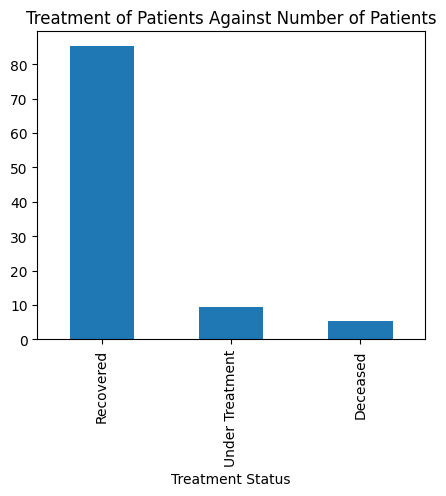

In [103]:
# 3. Calculating Percentage
percentage_of_Treatment_Status = ((treatment_status / total_patients) * 100).round(2)
percentage_of_Treatment_Status

for status_desc, num in percentage_of_Treatment_Status.items():
    print(f'{status_desc} = {num} %')


# 4. Visualization Charts

plt.figure(figsize= (5,4))
plt.title('Treatment of Patients Against Number of Patients')
percentage_of_Treatment_Status.plot(kind='bar')


9. What are the peak days of the week on the monthly basis for admissions and discharges ? 